In [1]:
# Author: Van Hoan Do <vanhoan310@gmail.com>
# License: BSD 3 clause (C) 2020
from numpy import genfromtxt
from Jvis import TSNE, JTSNE
import numpy as np 
import matplotlib
import pylab as plt
import pandas as pd

In [27]:
rna_matrix = np.genfromtxt('data/cbmc_rna_pca.csv', delimiter=',')
adt_matrix = np.genfromtxt('data/cbmc_adt.csv', delimiter=',')
method = 'CiteFuse' # 'CiteFuse'
# method = 'Specter' # 'Specter'
if method == 'Specter':
    y = np.genfromtxt('data/cbmc_jointspecter_labels.csv', delimiter=',')
    cell_types = ["NK", "pDCs", "Eryth", "CD8 T", "CD14+ Mono", "CD4 T", "DC", "CD34+", "CD16+ Mono", "MK", "B"] #specter
else:
    y = np.genfromtxt('data/cbmc_citefuse_labels.csv', delimiter=',')
    cell_types = ["CD4 T", "CD14+ Mono", "B", "NK", "CD34+", "pDCs", "CD8 T", "CD16+ Mono", "Eryth", "DC"] # citefuse
labels_true = y.astype(int)

In [3]:
title_fz = 14
dpi = 200
# dpi = 50
colors = ['cyan','black', 'gold', 'olive', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','magenta','tomato', 'olive',
                 'cyan','black', 'gold', 'magenta', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','#fb9a99','tomato', 'olive']
colors_map = {"NK":'black', "pDCs":'cyan', "Eryth":'gold', "CD8 T":'magenta', "CD14+ Mono":'blue', 
                  "CD4 T":'silver', "DC":'lime', "CD34+":'#fdbf6f', "CD16+ Mono":'#a6cee3', "MK":'#cab2d6', "B":'#fb9a99'}

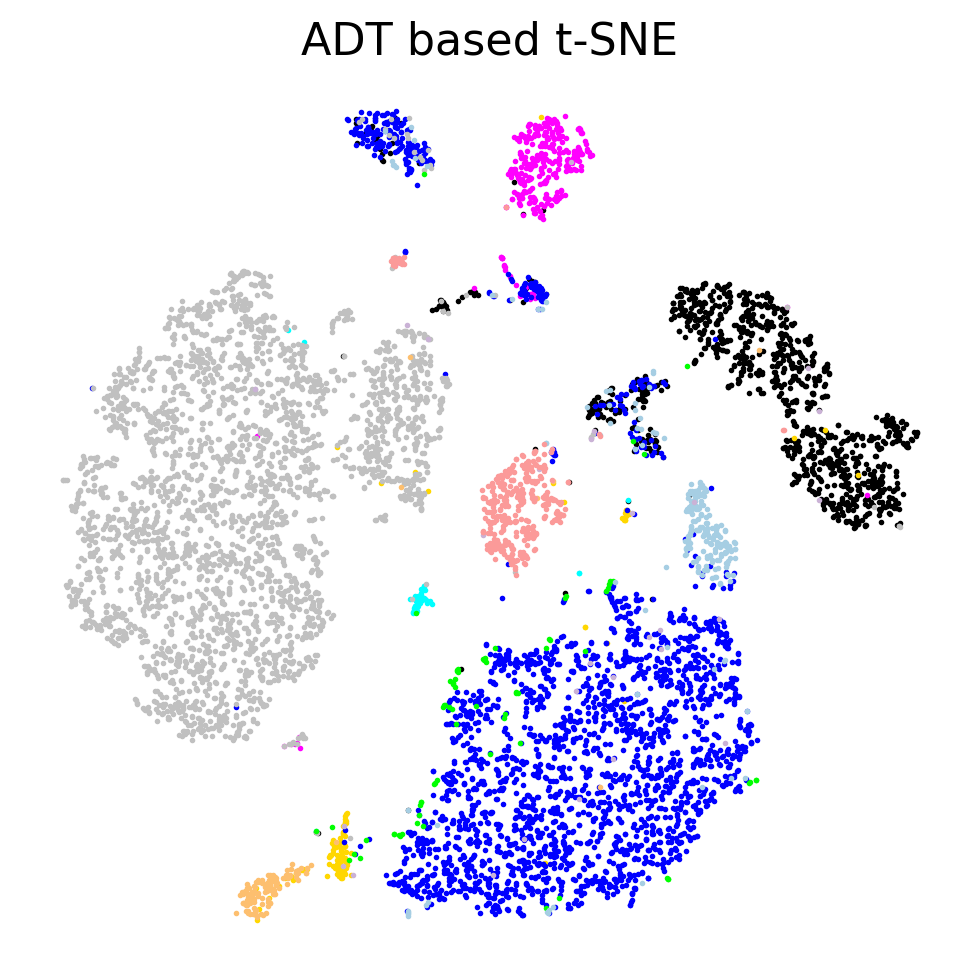

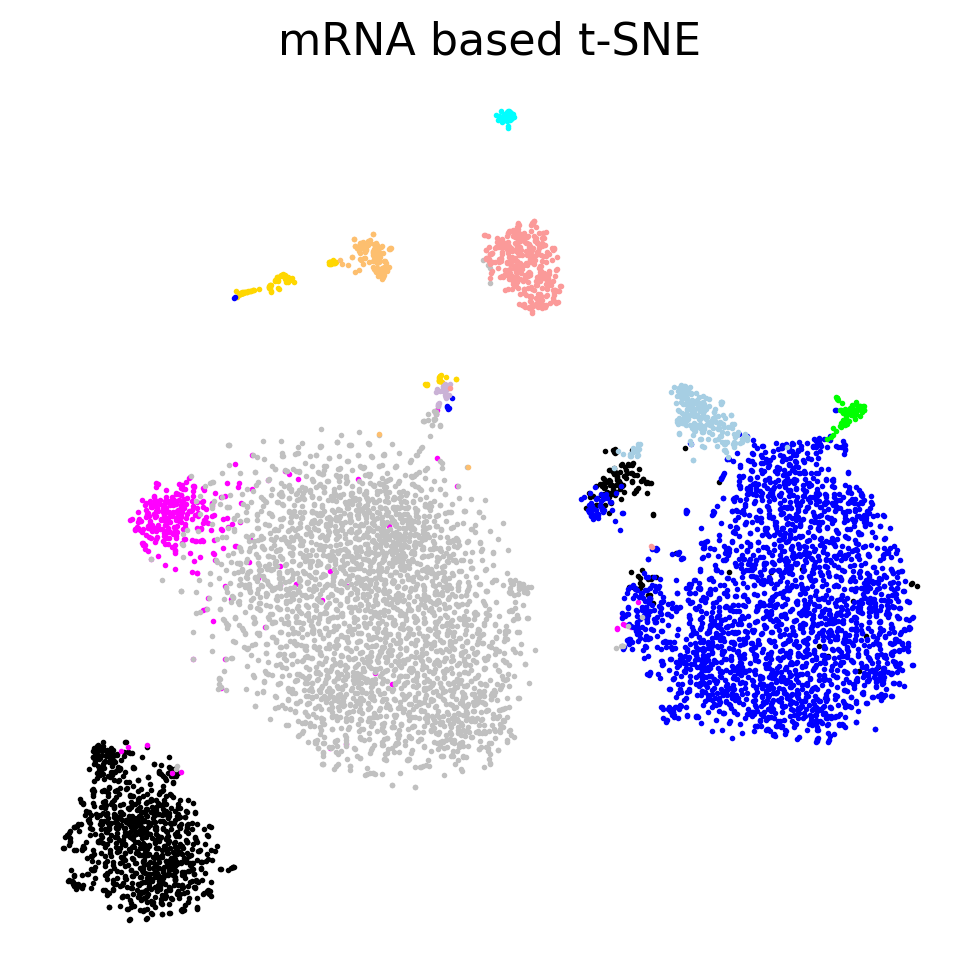

In [4]:
for alpha in [0.0, 1.0]:
    if alpha==1.0:
        Z = TSNE(init='pca').fit_transform(rna_matrix)
    if alpha==0.0:
        Z = TSNE(init='pca').fit_transform(adt_matrix)
   
    data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})
    plt.figure(figsize=(5, 5), dpi = dpi) # nolegend: 10, legend: 11
    for label in range(1, len(np.unique(labels_true))+1, 1):
        #add data points 
        i = label-1
        plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                    y=data2.loc[data2['label']==label,'y'], 
                    color=colors_map[cell_types[i]], 
                    s = 1, label = cell_types[i])
        plt.tight_layout()
        if alpha == 1.0:
            plt.title("mRNA based t-SNE", fontdict = {'fontsize' : title_fz+2})
        if alpha == 0.0:
            plt.title("ADT based t-SNE", fontdict = {'fontsize' : title_fz+2})
        plt.axis('off')
    if alpha == 1.0:
        plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_RNAbasedTsne.pdf', dpi = dpi)
    else:
        plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_ADTbasedTsne.pdf', dpi = dpi)
    plt.show()

In [28]:
# Joint TSNE
Z = JTSNE(init = 'pca').fit_transform(X = {'adt': adt_matrix, 'rna': rna_matrix})
data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})

JVis version 0.05


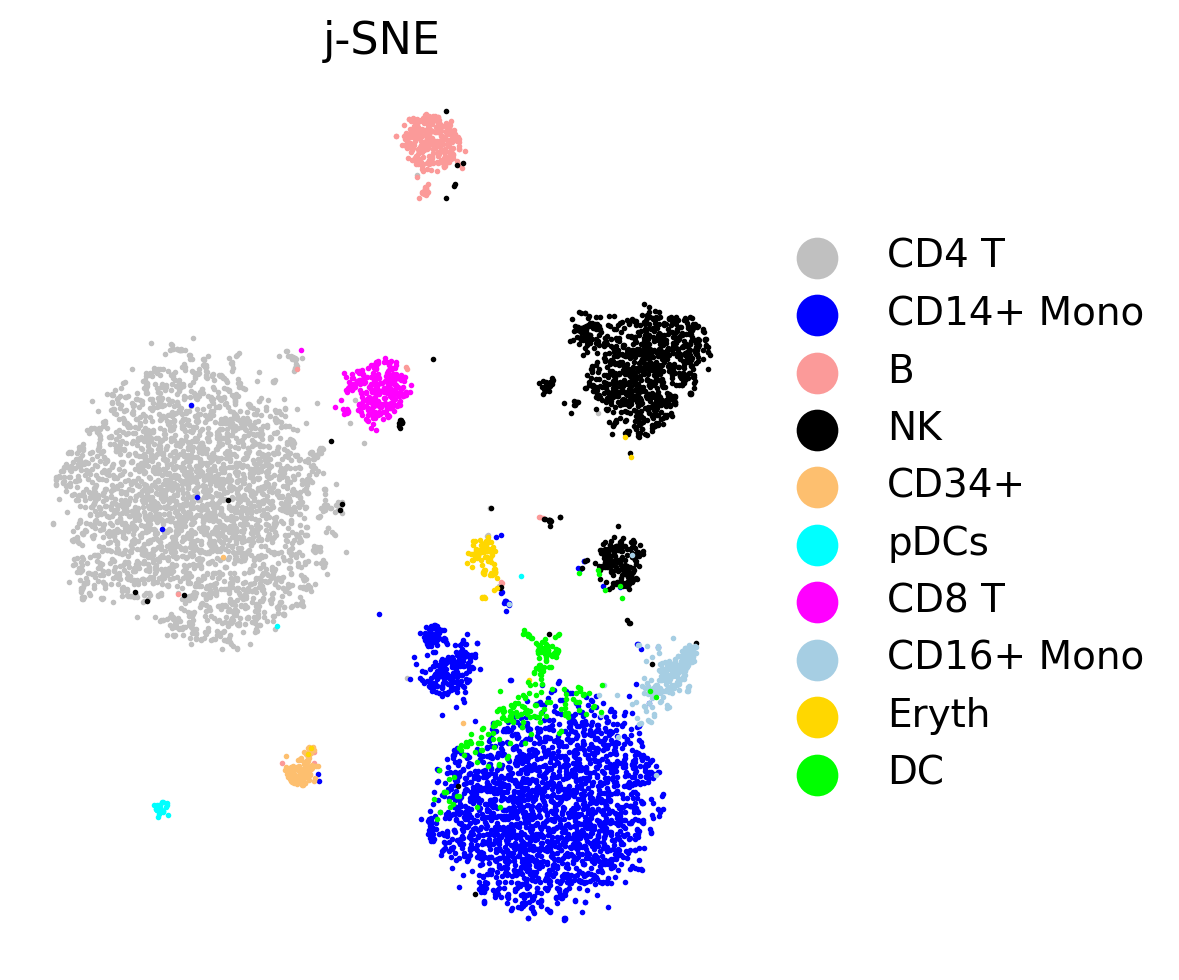

In [29]:
title_fz = 14
colors_map = {"NK":'black', "pDCs":'cyan', "Eryth":'gold', "CD8 T":'magenta', "CD14+ Mono":'blue', 
                  "CD4 T":'silver', "DC":'lime', "CD34+":'#fdbf6f', "CD16+ Mono":'#a6cee3', "MK":'#cab2d6', "B":'#fb9a99'}
plt.figure(figsize=(6, 5), dpi = dpi) # nolegend: 10, legend: 11
for label in range(1, len(np.unique(labels_true))+1, 1):
    #add data points 
    i = label-1
    plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                y=data2.loc[data2['label']==label,'y'], 
                color=colors_map[cell_types[i]], 
                s = 1, label = cell_types[i])
    plt.tight_layout()
    plt.title("j-SNE", fontdict = {'fontsize' : title_fz+2})
    plt.legend(loc='center left', numpoints=1, ncol=1, fontsize=title_fz, markerscale=title_fz, frameon=False, bbox_to_anchor=(1, 0.5))
    plt.axis('off')
plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_jointTsne.pdf', dpi = dpi)
plt.show()

## Compute KNI and CARI metrics on 4 clusters: CD4, CD8, CD14, DCs (Take intersection of two labels)

In [7]:
# Specter label
specter_labels = np.genfromtxt('data/cbmc_jointspecter_labels.csv', delimiter=',').astype(int)
specter_labels = specter_labels - min(specter_labels) # reindex to start from 0
cell_types = ["NK", "pDCs", "Eryth", "CD8 T", "CD14+ Mono", "CD4 T", "DC", "CD34+", "CD16+ Mono", "MK", "B"] #specter
subtypes = ["CD8 T", "CD14+ Mono", "CD4 T", "DC"]
subtypes_index = [3, 4, 5, 6]

In [8]:
# Citefuse
citefuse_labels = np.genfromtxt('data/cbmc_citefuse_labels.csv', delimiter=',').astype(int)
citefuse_labels = citefuse_labels - min(citefuse_labels) # reindex to start from 0
cell_types2 = ["CD4 T", "CD14+ Mono", "B", "NK", "CD34+", "pDCs", "CD8 T", "CD16+ Mono", "Eryth", "DC"] # citefuse
subtypes_index2 = [0, 1, 6, 9]

In [9]:
cd8 = (specter_labels==3) * (citefuse_labels==6)

In [10]:
cd4 = (specter_labels==5) * (citefuse_labels==0)

In [11]:
cd14 = (specter_labels==4) * (citefuse_labels==1)

In [12]:
dc = (specter_labels==6) * (citefuse_labels==9)

In [13]:
subtypes_cells = cd8 + cd4 +cd14 + dc

In [14]:
sum(subtypes_cells)

5599

In [15]:
subtypes_labels_level = cd8.astype(int) + 2* cd4.astype(int) + 3*cd14.astype(int) + 4*dc.astype(int)

In [16]:
subtypes_labels = subtypes_labels_level[subtypes_labels_level>0]

In [17]:
len(subtypes_labels)

5599

In [18]:
# RNA based tSNE
sub_tsne_rna = TSNE().fit_transform(rna_matrix[subtypes_cells==1])

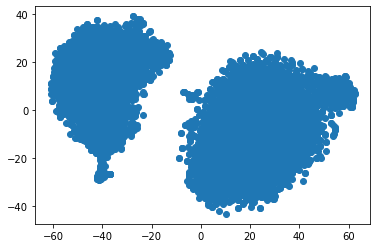

In [19]:
plt.scatter(sub_tsne_rna[:,0], sub_tsne_rna[:, 1])
plt.show()

In [20]:
## Compute two metrics
from joint_metrics import *
kNN = 10
KNI_metrics = KNI(sub_tsne_rna, subtypes_labels, kNN)
CARI_metrics = CARI(sub_tsne_rna, subtypes_labels)
print("KNI: ", KNI_metrics, ", CARI: ", CARI_metrics)

/home/vanhoan310/miniconda3/envs/tsne/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


KNI:  0.9784782996963743 , CARI:  0.4916574930429188


In [21]:
# ADT based tSNE
sub_tsne_adt = TSNE().fit_transform(adt_matrix[subtypes_cells==1])

In [22]:
KNI_metrics = KNI(sub_tsne_adt, subtypes_labels, kNN)
CARI_metrics = CARI(sub_tsne_adt, subtypes_labels)
print("KNI: ", KNI_metrics, ", CARI: ", CARI_metrics)

KNI:  0.99040900160743 , CARI:  0.05910654180779219


In [25]:
# joint TSNE
sub_joint_tsne = JTSNE(init='random').fit_transform(X = {'adt': adt_matrix[subtypes_cells==1], 'rna': rna_matrix[subtypes_cells==1]})

JVis version 0.05


In [26]:
## Compute two metrics
KNI_metrics = KNI(sub_joint_tsne, subtypes_labels, kNN)
CARI_metrics = CARI(sub_joint_tsne, subtypes_labels)
print("KNI: ", KNI_metrics, ", CARI: ", CARI_metrics)

KNI:  0.9983925701018039 , CARI:  0.8390473736205987
